In [42]:
import pandas as pd
import numpy as np
import quandl
import matplotlib.pyplot as plt
import datetime

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

In [49]:
quandl.ApiConfig.api_key = "tFEE_kK7R9MS3rJP1kTg"
df = quandl.get("WIKI/AMZN")
df = df[["Adj. Close"]]
df


,Adj. Close
Date,
1997-05-16,1.729167
1997-05-19,1.708333
1997-05-20,1.635833
1997-05-21,1.427500
1997-05-22,1.395833
...,...
2018-03-21,1581.860000
2018-03-22,1544.100000
2018-03-23,1495.560000


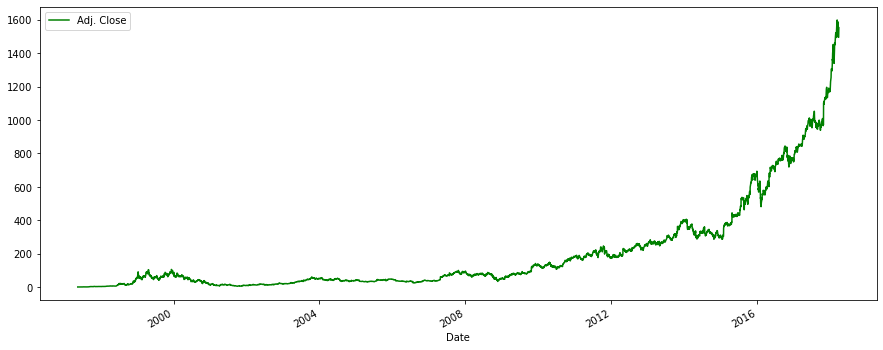

In [44]:
df["Adj. Close"].plot(figsize=(15,6), color="g")
plt.legend()
plt.show()

In [45]:
forecast = 30

df["Prediction"] = df[["Adj. Close"]].shift(-forecast)

X = np.array(df.drop(["Prediction"], 1))
X = preprocessing.scale(X)

X_forecast = X[-forecast:]
X = X[:-forecast]

y = np.array(df["Prediction"])
y = y[:-forecast]


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearRegression()
clf.fit(X_train, y_train)

forecast_predicted = clf.predict(X_forecast)
print(forecast_predicted)

[1499.30274537 1538.11880803 1549.49592984 1535.61180453 1556.49641843
 1571.97397817 1573.92859107 1590.11788485 1613.43514198 1602.84411448
 1603.3433906  1583.15988785 1590.38345726 1615.19854274 1630.10246609
 1637.92091768 1645.20822447 1673.92191285 1694.63656041 1683.79058341
 1686.78624013 1677.56556624 1666.2628047  1637.84655741 1682.01655974
 1677.07691302 1636.96485703 1585.40131895 1649.45738294 1586.98413048]


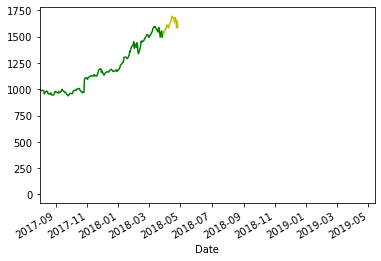

In [47]:
dates = pd.date_range(start="2018-03-28", end="2018-04-26")
plt.plot(dates, forecast_predicted, color="y")
df["Adj. Close"].plot(color="g")
plt.xlim(xmin = datetime.date(2017,8,1))
plt.show()